## 삼성전자 주가 데이터 불러오기

In [2]:
!pip install ta

  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29428 sha256=e69726dea1c18bdbb6955cc230c95ae440494436e68de4e3a82f241529224710
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\b1\8e\55\64e87f8cc064571b0096ff2e5f32a4d29e444705f33b361a3d
Successfully built ta


In [2]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import ta

df = fdr.DataReader('005930','2004-11-16', '2024-08-16')

### 파생 변수 생성하기
#### 각종 경제지표

In [3]:
# 볼린저밴드
bb = ta.volatility.BollingerBands(close=df['Close'], window=20, fillna=False)
df['PB'] = bb.bollinger_pband()
df['BandWidth'] = bb.bollinger_wband()

In [4]:
# DMI, ADX
# dmi = ta.trend.ADXIndicator(high=df['High'], low=df['Low'], close=df['Close'], window=14, fillna=False)
# df['PDI'],df['MDI'],df['ADX'] = dmi.adx_pos(),dmi.adx_neg(),dmi.adx()

pdiff, ndiff = df['High'].diff(1), df['Low'].diff(1)
pdm = pd.Series(np.where((pdiff > 0) & (pdiff > -ndiff), pdiff, 0), index=df.index)
ndm = pd.Series(np.where((-ndiff > 0) & (-ndiff > pdiff), -ndiff, 0), index=df.index)

tr = pd.DataFrame()
tr['1'] = df['High'] - df['Low']
tr['2'] = (df['High'] - df['Close'].shift(-1)).abs()
tr['3'] = (df['Low'] - df['Close'].shift(-1)).abs()
tr = tr.max(axis = 1)

def sum_index(df,nums):
    sum = pd.Series(np.nan, index=df.index)
    sum.iloc[13] = nums[0:14].sum()
    for i in range(14,len(df)):
        sum.iloc[i] = sum.iloc[i-1] - sum.iloc[i-1]/14 + nums.iloc[i]
    return sum

pdmn, ndmn, trn = sum_index(df,pdm), sum_index(df,ndm), sum_index(df,tr)

df['PDI'], df['MDI'] = pdmn/trn*100, ndmn/trn*100
dx = ((df['PDI']-df['MDI']).abs()) / (df['PDI']+df['MDI']) * 100

adx = pd.Series(np.nan, index=df.index)
adx.iloc[26] = dx[13:27].mean()
for i in range(27,len(df)):
    adx.iloc[i] = (adx.iloc[i-1]*13 + dx.iloc[i])/14

df['ADX'] = adx

In [5]:
# WMA (가중이동평균)
df['CWMA'] = ta.trend.WMAIndicator(close=df['Close'], window=5, fillna=False).wma()
df['VWMA'] = ta.trend.WMAIndicator(close=df['Volume'], window=5, fillna=False).wma()

In [6]:
# MACD
#df['MACD'] = ta.trend.macd(close=df['Close'], window_slow=26, window_fast=12, fillna=False)
df['MACD_sig'] = ta.trend.macd_signal(close=df['Close'], window_slow=26, window_fast=12, window_sign=9, fillna=False)

In [7]:
# RSI
df['RSI'] = ta.momentum.rsi(close=df['Close'], window=14, fillna=False)
#df['RSI_sig'] = df['RSI'].rolling(9).mean()

In [8]:
# STOCHASTIC FAST
df['%K'] = ta.momentum.stoch(high=df['High'], low=df['Low'], close=df['Close'], window=14, smooth_window=3, fillna=False)
df['%D'] = ta.momentum.stoch_signal(high=df['High'], low=df['Low'], close=df['Close'], window=14, smooth_window=3, fillna=False)

# STOCAHSTIC SLOW (FAST와 SLOW 둘 중 하나를 반영해야 함)
# #장기기간 분석하므로, 노이즈 감소를 위해 slow사용
# df['Slow_%K'] = df['%D']
# df['Slow_%D'] = df['Slow_%K'].rolling(3).mean()

In [9]:
df

,Open,High,Low,Close,Volume,Change,PB,BandWidth,PDI,MDI,ADX,CWMA,VWMA,MACD_sig,RSI,%D,Slow_%K,Slow_%D
Date,,,,,,,,,,,,,,,,,,
2004-11-16,9180,9200,9100,9110,495098,-0.002191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-17,9120,9250,9110,9230,439562,0.013172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-18,9300,9390,9200,9270,588572,0.004334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-19,9200,9320,8990,9080,445179,-0.020496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-22,8840,8910,8730,8800,691533,-0.030837,NaN,NaN,NaN,NaN,NaN,9046.666667,5.585546e+05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-09,75700,75800,74200,74700,16388222,0.017711,0.185381,24.377061,19.726125,32.691508,24.093548,73840.000000,2.952870e+07,-1241.965020,38.460203,25.576520,25.576520,20.860623
2024-08-12,75200,75900,74800,75500,9839259,0.010710,0.251606,24.276895,19.352107,31.675436,24.097605,74560.000000,2.084730e+07,-1457.501162,40.593091,27.253669,27.253669,24.521188
2024-08-13,76500,76600,75500,76100,10716261,0.007947,0.303029,23.327003,20.267308,30.347132,23.798841,75206.666667,1.544286e+07,-1612.077412,42.210815,32.914046,32.914046,28.581412


In [10]:
# 결측치 제거
df = df.dropna(axis=0)

## 파생변수 생성

* STOCHASTIC Fast에서 %K 선이 20 아래에 있다면 과매도, 80 위에 있다면 과매수 구간

* RSI에서 보통 RSI 70 이상을 과매수 상태로, RSI 30 이하를 과매도 상태

In [11]:
# 과매수/과매도 라벨링
def label_condition(row):
    if row['Slow_%K'] < 20 or row['RSI'] < 30:
        return 'Oversold'  # 과매도
    elif row['Slow_%K'] > 80 or row['RSI'] > 70:
        return 'Overbought'  # 과매수
    else:
        return 'Neutral'  # 중립

df['condition'] = df.apply(label_condition, axis=1)

# 원핫 인코딩 수행
df = pd.get_dummies(df, columns=['condition'])
df

<ipython-input-11-f30d1c14b61f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['condition'] = df.apply(label_condition, axis=1)


,Open,High,Low,Close,Volume,Change,PB,BandWidth,PDI,MDI,...,CWMA,VWMA,MACD_sig,RSI,%D,Slow_%K,Slow_%D,condition_Neutral,condition_Overbought,condition_Oversold
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,9050,9060,8920,9020,218558,0.001110,0.830672,14.216802,25.061785,16.666227,...,8933.333333,2.854477e+05,8.026895,60.868231,95.071968,95.071968,87.469407,0,1,0
2005-01-04,9000,9020,8920,8940,280347,-0.008869,0.740158,14.258669,23.820406,15.840703,...,8954.000000,2.846097e+05,18.353520,57.163053,92.658012,92.658012,91.732749,0,1,0
2005-01-05,8800,8860,8730,8860,467322,-0.008949,0.655719,13.619401,22.614102,21.052193,...,8935.333333,3.431052e+05,26.295688,53.646292,78.485771,78.485771,88.738584,1,0,0
2005-01-06,8780,8910,8700,8700,343063,-0.018059,0.507378,13.255827,22.693955,19.645938,...,8854.000000,3.472080e+05,29.714342,47.369459,53.706004,53.706004,74.949929,1,0,0
2005-01-07,8820,8830,8710,8810,272369,0.012644,0.583858,12.445985,21.797913,18.870243,...,8822.000000,3.276877e+05,31.805796,51.565263,41.304348,41.304348,57.832041,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-09,75700,75800,74200,74700,16388222,0.017711,0.185381,24.377061,19.726125,32.691508,...,73840.000000,2.952870e+07,-1241.965020,38.460203,25.576520,25.576520,20.860623,1,0,0
2024-08-12,75200,75900,74800,75500,9839259,0.010710,0.251606,24.276895,19.352107,31.675436,...,74560.000000,2.084730e+07,-1457.501162,40.593091,27.253669,27.253669,24.521188,1,0,0
2024-08-13,76500,76600,75500,76100,10716261,0.007947,0.303029,23.327003,20.267308,30.347132,...,75206.666667,1.544286e+07,-1612.077412,42.210815,32.914046,32.914046,28.581412,1,0,0


In [84]:
df['Volatility'] = df['Close'].rolling(window=window_size).std()

## 전처리

In [118]:
# #change에 음수값을 고려해주기 위하여 StandardScaler사용
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaled = scaler.fit_transform(df)
# scaled_df = pd.DataFrame(scaled, columns=df.columns, index = df.index)
# scaled_df

,Open,High,Low,Close,Volume,Change,PB,BandWidth,PDI,MDI,...,CWMA,VWMA,MACD_sig,RSI,%D,Slow_%K,Slow_%D,condition_Neutral,condition_Overbought,condition_Oversold
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,-1.147555,-1.152678,-1.148101,-1.151593,-0.597204,0.027979,0.917639,0.687211,0.586327,-0.543755,...,-1.155358,-0.616709,-0.151820,0.799455,1.462752,1.462752,1.240580,-1.136896,1.723288,-0.47532
2005-01-04,-1.149787,-1.154449,-1.148101,-1.155170,-0.590007,-0.530610,0.641273,0.695883,0.377500,-0.678924,...,-1.154433,-0.616811,-0.135635,0.468942,1.378947,1.378947,1.393782,-1.136896,1.723288,-0.47532
2005-01-05,-1.158713,-1.161534,-1.156657,-1.158746,-0.568229,-0.535052,0.383452,0.563472,0.174574,0.174390,...,-1.155268,-0.609676,-0.123187,0.155236,0.886934,0.886934,1.286188,0.879588,-0.580286,-0.47532
2005-01-06,-1.159606,-1.159320,-1.158008,-1.165899,-0.582702,-1.045003,-0.069478,0.488165,0.188007,-0.055866,...,-1.158907,-0.609176,-0.117829,-0.404676,0.026663,0.026663,0.790696,0.879588,-0.580286,-0.47532
2005-01-07,-1.157820,-1.162863,-1.157558,-1.160982,-0.590936,0.673597,0.164040,0.320424,0.037273,-0.182876,...,-1.160338,-0.611557,-0.114551,-0.030397,-0.403881,-0.403881,0.175569,0.879588,-0.580286,-0.47532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-09,1.827146,1.802771,1.791564,1.784725,1.286127,0.957256,-1.052633,2.791689,-0.311246,2.080178,...,1.748258,2.950330,-2.110913,-1.199408,-0.949899,-0.949899,-1.152990,0.879588,-0.580286,-0.47532
2024-08-12,1.804830,1.807199,1.818583,1.820490,0.523349,0.565329,-0.850429,2.770941,-0.374164,1.913809,...,1.780467,1.891388,-2.448719,-1.009148,-0.891674,-0.891674,-1.021449,0.879588,-0.580286,-0.47532
2024-08-13,1.862852,1.838197,1.850105,1.847314,0.625496,0.410696,-0.693418,2.574192,-0.220207,1.696317,...,1.809396,1.232164,-2.690984,-0.864842,-0.695165,-0.695165,-0.875546,0.879588,-0.580286,-0.47532


In [85]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
# 스케일 후 columns
scaled = scaler.fit_transform(df)

#스케일 적용한 값으로 데이터 프레임 만들기
scaled_df = pd.DataFrame(scaled, columns=df.columns, index = df.index)
scaled_df

,Open,High,Low,Close,Volume,Change,PB,BandWidth,PDI,MDI,...,VWMA,MACD_sig,RSI,%D,Slow_%K,Slow_%D,condition_Neutral,condition_Overbought,condition_Oversold,Volatility
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,0.100221,0.093595,0.099665,0.010501,0.002420,0.517269,0.655497,0.336536,0.504838,0.178047,...,0.002998,0.385144,0.645378,0.955449,0.955449,0.884770,0.0,1.0,0.0,NaN
2005-01-04,0.099668,0.093182,0.099665,0.009535,0.003104,0.480047,0.606235,0.337713,0.475880,0.166593,...,0.002984,0.386509,0.589775,0.931091,0.931091,0.928720,0.0,1.0,0.0,NaN
2005-01-05,0.097453,0.091529,0.097542,0.008570,0.005175,0.479751,0.560278,0.319744,0.447740,0.238902,...,0.003955,0.387560,0.537000,0.788087,0.788087,0.897854,1.0,0.0,0.0,NaN
2005-01-06,0.097231,0.092045,0.097207,0.006639,0.003799,0.445770,0.479543,0.309524,0.449603,0.219390,...,0.004023,0.388012,0.442805,0.538049,0.538049,0.755710,1.0,0.0,0.0,NaN
2005-01-07,0.097674,0.091219,0.097318,0.007966,0.003016,0.560291,0.521168,0.286761,0.428700,0.208627,...,0.003699,0.388288,0.505771,0.412912,0.412912,0.579246,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-09,0.838317,0.783058,0.829050,0.803259,0.181474,0.579193,0.304294,0.622128,0.380371,0.400397,...,0.488520,0.219836,0.309106,0.254211,0.254211,0.198116,1.0,0.0,0.0,0.748819
2024-08-12,0.832780,0.784091,0.835754,0.812915,0.108954,0.553077,0.340338,0.619312,0.371647,0.386299,...,0.344383,0.191332,0.341114,0.271135,0.271135,0.235852,1.0,0.0,0.0,0.740398
2024-08-13,0.847176,0.791322,0.843575,0.820157,0.118666,0.542772,0.368325,0.592612,0.392996,0.367869,...,0.254654,0.170890,0.365390,0.328250,0.328250,0.277708,1.0,0.0,0.0,0.705528


In [108]:
# #날짜 관련한 칼럼은 이후 매매동향 크롤링과, 감성분석 데이터를 합쳐줄 때 사용한다.
# # Date 인덱스를 새로운 칼럼으로 변환
# scaled_df['Date'] = df.index

# # 인덱스 재설정 (원하는 경우)
# scaled_df.reset_index(drop=True, inplace=True)

# scaled_df

## 시각화

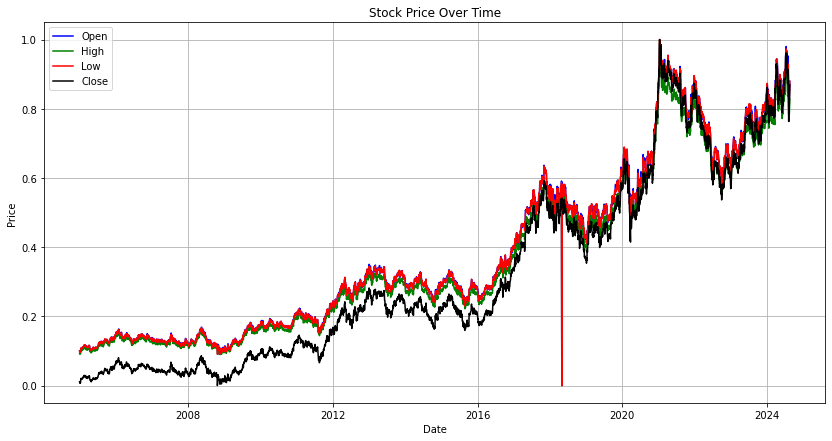

In [77]:
plt.figure(figsize=(14, 7))

# Open, High, Low, Close 시계열 그래프
plt.plot(scaled_df.index, scaled_df['Open'], label='Open', color='blue')
plt.plot(scaled_df.index, scaled_df['High'], label='High', color='green')
plt.plot(scaled_df.index, scaled_df['Low'], label='Low', color='red')
plt.plot(scaled_df.index, scaled_df['Close'], label='Close', color='black')

plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

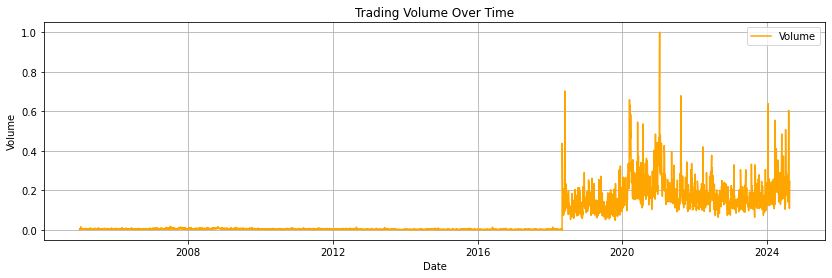

In [78]:
plt.figure(figsize=(14, 4))

plt.plot(scaled_df.index, scaled_df['Volume'], label='Volume', color='orange')

plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

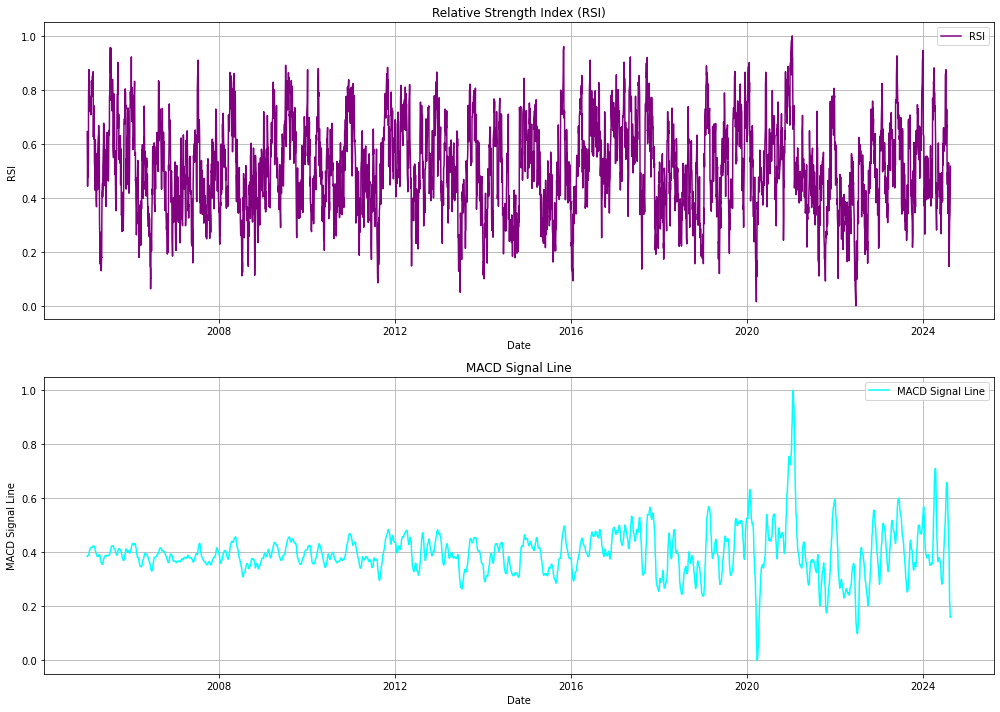

In [79]:
plt.figure(figsize=(14, 10))

# RSI 시계열 그래프
plt.subplot(2, 1, 1)
plt.plot(scaled_df.index, scaled_df['RSI'], label='RSI', color='purple')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)

# MACD 시계열 그래프
plt.subplot(2, 1, 2)
plt.plot(scaled_df.index, scaled_df['MACD_sig'], label='MACD Signal Line', color='cyan')
plt.title('MACD Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD Signal Line')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


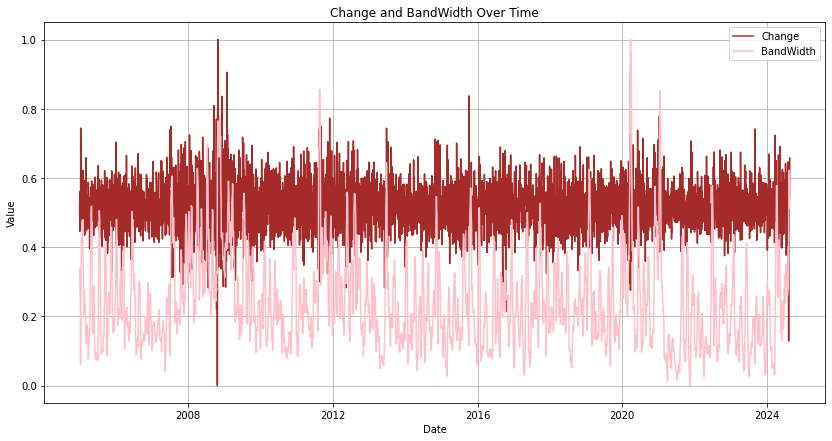

In [81]:
plt.figure(figsize=(14, 7))

# 변화율 시계열 그래프
plt.plot(scaled_df.index, scaled_df['Change'], label='Change', color='brown')

# BandWidth 시계열 그래프
plt.plot(scaled_df.index, scaled_df['BandWidth'], label='BandWidth', color='pink')

plt.title('Change and BandWidth Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


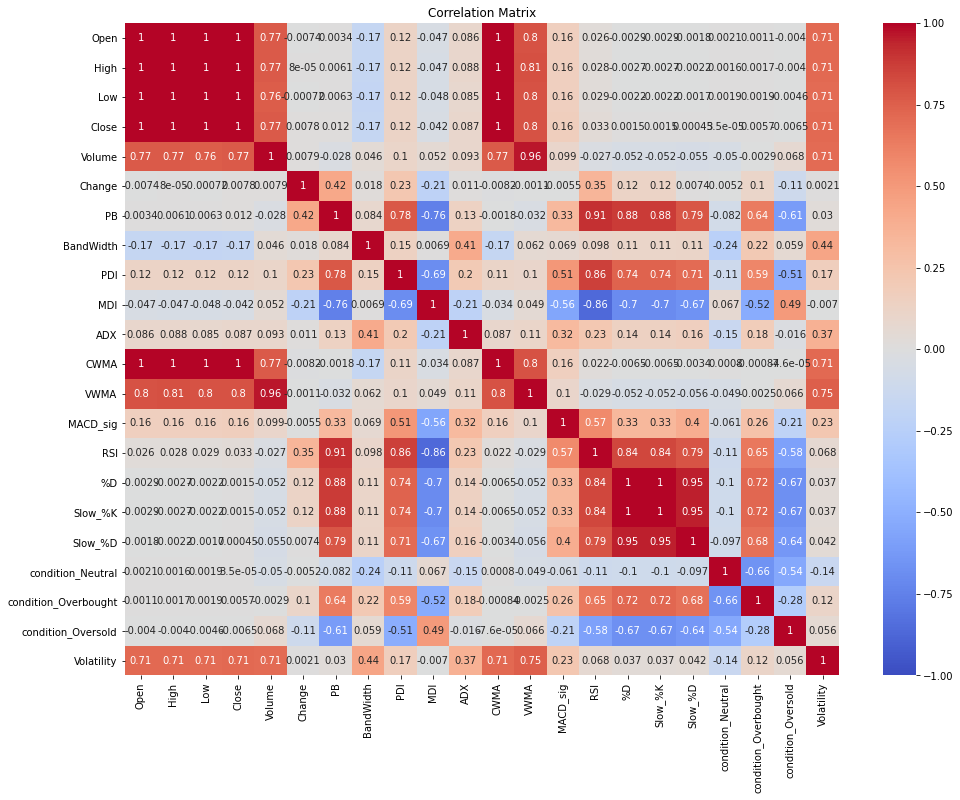

In [86]:
import seaborn as sns

# 상관관계 계산
correlation_matrix = scaled_df.corr()

plt.figure(figsize=(16, 12))

# 히트맵 시각화
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


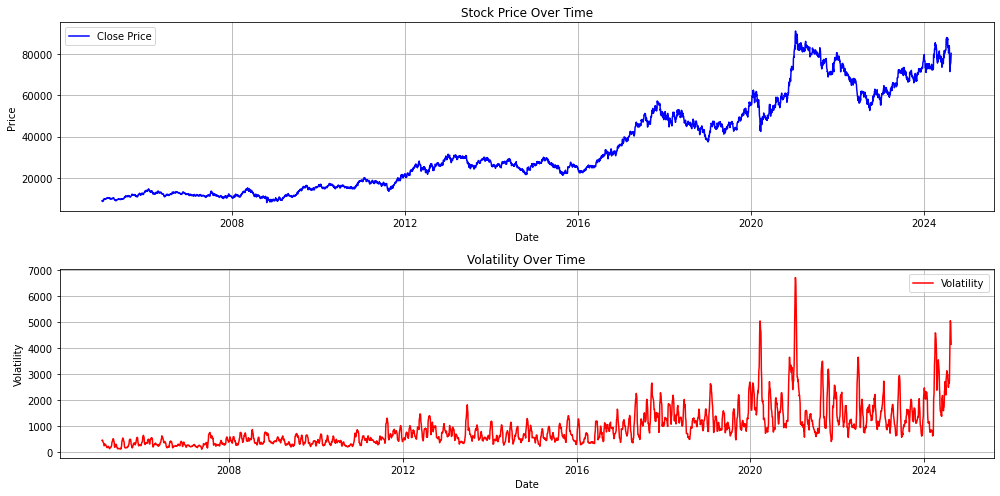

In [92]:
# 변동성 시각화 (표준편차를 사용하여 변동성 계산)
# 이 예제에서는 rolling window를 사용하여 변동성 계산
window_size = 20  # 30일 이동 윈도우

# 시각화
plt.figure(figsize=(14, 7))

# 주가와 변동성의 시계열 그래프를 그립니다.
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(df.index, df['Volatility'], label='Volatility', color='red')
plt.title('Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### 이상치 확인

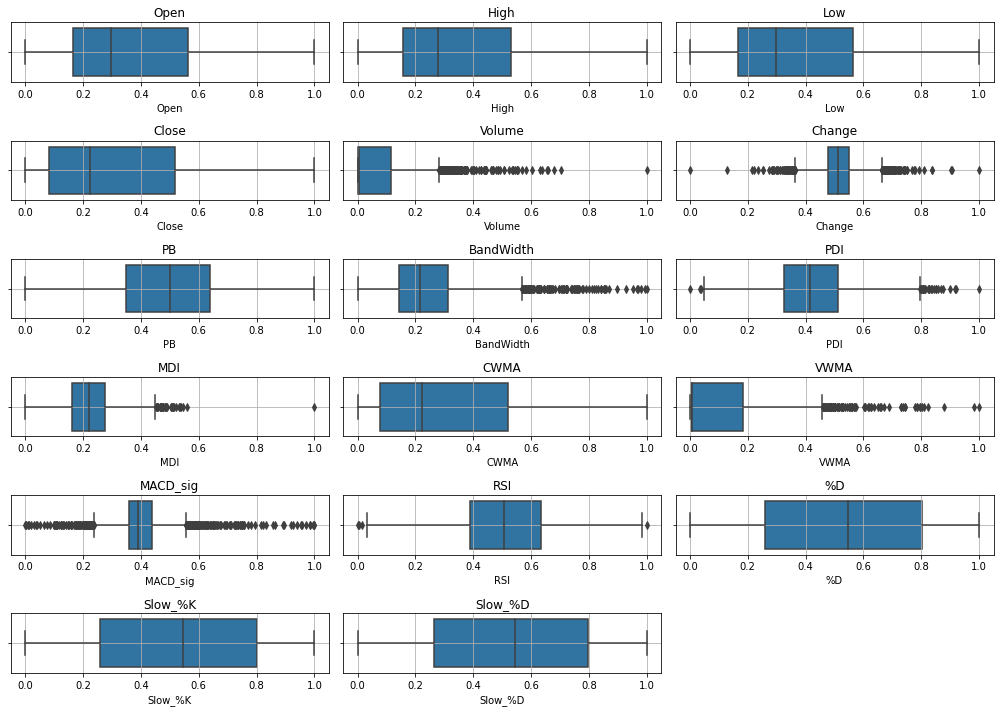

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 (실제 데이터로 대체하세요)
# scaled_df = pd.read_csv('path_to_your_data.csv')

plt.figure(figsize=(14, 10))

# 피처 리스트
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Change', 'PB', 'BandWidth', 'PDI', 'MDI', 'CWMA', 'VWMA', 'MACD_sig', 'RSI', '%D', '%K', '%D']

# 상자 수염 그림 생성
for i, feature in enumerate(features):
    plt.subplot(len(features) // 3 + 1, 3, i + 1)
    sns.boxplot(x=scaled_df[feature])
    plt.title(feature)
    plt.grid(True)

plt.tight_layout()
plt.show()


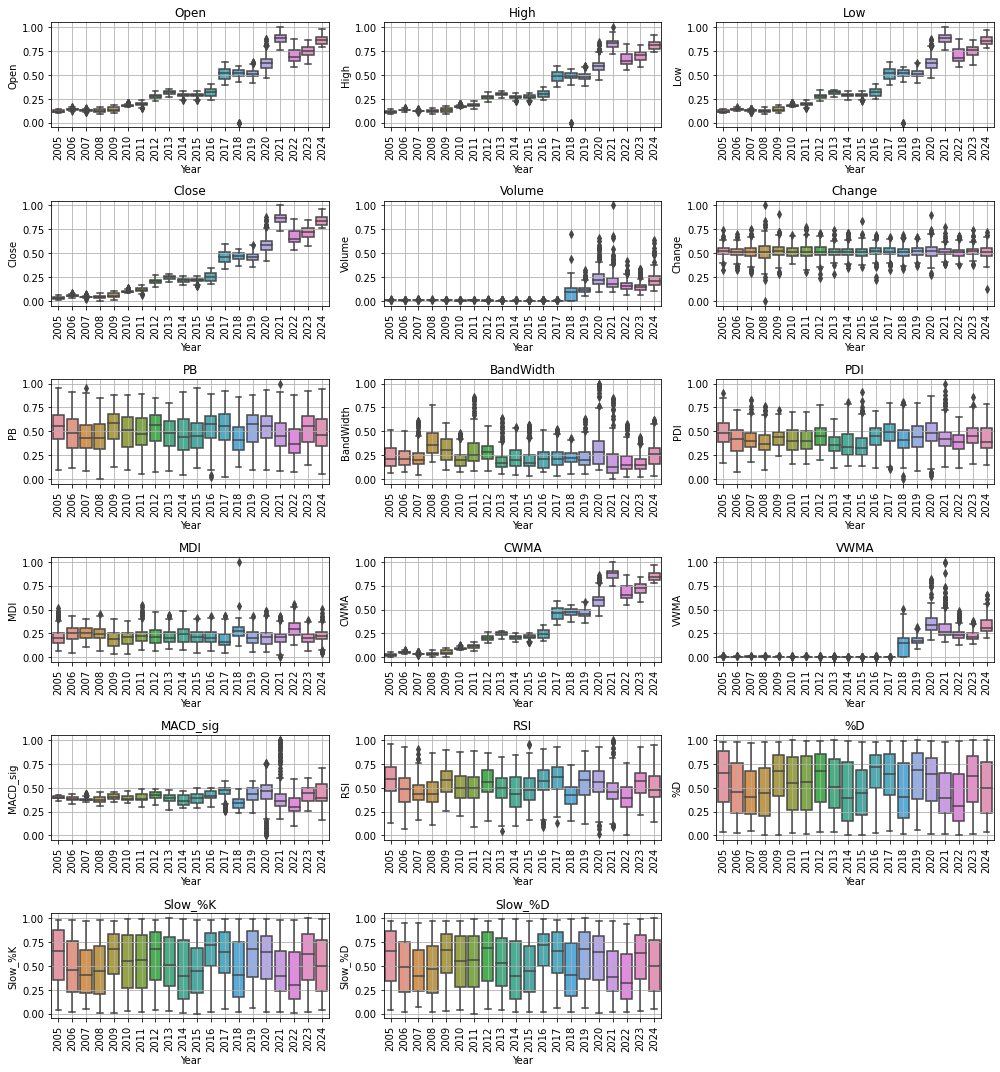

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 (실제 데이터로 대체하세요)
# scaled_df = pd.read_csv('path_to_your_data.csv', index_col='Date', parse_dates=True)

# 연도별로 그룹화
scaled_df['Year'] = scaled_df.index.year
years = scaled_df['Year'].unique()

plt.figure(figsize=(14, 15))

# 피처 리스트
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Change', 'PB', 'BandWidth', 'PDI', 'MDI', 'CWMA', 'VWMA', 'MACD_sig', 'RSI', '%D', '%K', '%D']

# 연도별 상자 수염 그림 생성
for i, feature in enumerate(features):
    plt.subplot(len(features) // 3 + 1, 3, i + 1)
    sns.boxplot(x='Year', y=feature, data=scaled_df)
    plt.title(feature)
    plt.xticks(rotation=90)
    plt.grid(True)

plt.tight_layout()
plt.show()


## 모델링


### 1) window_size = 20으로 설정하여 단기 분석

In [87]:
#train, test set 분할
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_df.drop('Close', 1), scaled_df['Close'], test_size=0.2, random_state=0, shuffle=False)

import tensorflow as tf
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

#window_size : 시계열 예측을 위해 사용할 데이터 최근 갯수
WINDOW_SIZE=20
BATCH_SIZE=32

# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [88]:
x_test

,Open,High,Low,Volume,Change,PB,BandWidth,PDI,MDI,ADX,...,VWMA,MACD_sig,RSI,%D,Slow_%K,Slow_%D,condition_Neutral,condition_Overbought,condition_Oversold,Volatility
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-08,0.635659,0.606405,0.639106,0.349007,0.658371,0.666219,0.241196,0.599222,0.171141,0.228345,...,0.410479,0.379586,0.655331,0.585399,0.585399,0.401885,1.0,0.0,0.0,0.221008
2020-09-09,0.644518,0.612603,0.645810,0.338818,0.494066,0.637462,0.243393,0.615945,0.156376,0.247006,...,0.449611,0.386509,0.630621,0.773417,0.773417,0.581166,1.0,0.0,0.0,0.222767
2020-09-10,0.663344,0.619835,0.660335,0.331354,0.564226,0.704750,0.246583,0.658230,0.146920,0.270475,...,0.469857,0.397106,0.673583,0.903213,0.903213,0.757345,0.0,1.0,0.0,0.225301
2020-09-11,0.656700,0.613636,0.650279,0.177364,0.500528,0.683088,0.250808,0.586956,0.182411,0.276403,...,0.411439,0.408999,0.655831,0.847155,0.847155,0.846485,0.0,1.0,0.0,0.228666
2020-09-14,0.666667,0.628099,0.669274,0.228647,0.601639,0.760324,0.286442,0.700756,0.170765,0.294498,...,0.385429,0.423977,0.727601,0.884485,0.884485,0.884309,0.0,1.0,0.0,0.257087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-09,0.838317,0.783058,0.829050,0.181474,0.579193,0.304294,0.622128,0.380371,0.400397,0.327942,...,0.488520,0.219836,0.309106,0.254211,0.254211,0.198116,1.0,0.0,0.0,0.748819
2024-08-12,0.832780,0.784091,0.835754,0.108954,0.553077,0.340338,0.619312,0.371647,0.386299,0.328018,...,0.344383,0.191332,0.341114,0.271135,0.271135,0.235852,1.0,0.0,0.0,0.740398
2024-08-13,0.847176,0.791322,0.843575,0.118666,0.542772,0.368325,0.592612,0.392996,0.367869,0.322447,...,0.254654,0.170890,0.365390,0.328250,0.328250,0.277708,1.0,0.0,0.0,0.705528


In [89]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda,Bidirectional
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 모델 정의
model1 = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    
    # 양방향 LSTM
    Bidirectional(LSTM(16, activation='tanh')),
    
    # Dense 레이어
    Dense(16, activation="relu"),
    Dense(1),
])

In [91]:
import os
loss = Huber()
optimizer = Adam(0.005)
model1.compile(loss=Huber(), optimizer = optimizer, metrics = ['mse'])

#earlystopping 
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 10)
#val_loss 기준 체크포인터도 생성
filename = os.path.join('tmp', 'checkpointer.ckpt')
checkpoint = ModelCheckpoint(filename,
                            save_weights_only = True,
                            save_best_only=True,
                            monitor='val_loss',
                            verbose=1)

history = model1.fit(train_data,
                    validation_data=(test_data),
                    epochs=50,
                    callbacks=[checkpoint, earlystopping])

model1.load_weights(filename)
pred1 = model1.predict(test_data)

Epoch 1/50
    121/Unknown - 17s 29ms/step - loss: 1.6897e-04 - mse: 3.3794e-04
Epoch 1: val_loss improved from inf to 0.00126, saving model to tmp\checkpointer.ckpt
121/121 [==============================] - 21s 58ms/step - loss: 1.6897e-04 - mse: 3.3794e-04 - val_loss: 0.0013 - val_mse: 0.0025
Epoch 2/50
119/121 [============================>.] - ETA: 0s - loss: 8.4826e-05 - mse: 1.6965e-04
Epoch 2: val_loss improved from 0.00126 to 0.00092, saving model to tmp\checkpointer.ckpt
121/121 [==============================] - 4s 33ms/step - loss: 8.6047e-05 - mse: 1.7209e-04 - val_loss: 9.1976e-04 - val_mse: 0.0018
Epoch 3/50
120/121 [============================>.] - ETA: 0s - loss: 7.8159e-05 - mse: 1.5632e-04
Epoch 3: val_loss improved from 0.00092 to 0.00028, saving model to tmp\checkpointer.ckpt
121/121 [==============================] - 4s 34ms/step - loss: 7.8507e-05 - mse: 1.5701e-04 - val_loss: 2.7884e-04 - val_mse: 5.5768e-04
Epoch 4/50
120/121 [============================>.] -

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D ,Dropout, Lambda,Bidirectional, BatchNormalization,mean_squared_error
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model2 = Sequential([
    # Conv1D 레이어 (필터 수 증가, 배치 정규화 추가)
    Conv1D(filters=64, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    BatchNormalization(),
    
    # 양방향 LSTM 레이어 (유닛 수 증가, 드롭아웃 추가)
    Bidirectional(LSTM(64, activation='tanh', return_sequences=True)),
    Dropout(0.2),
    
    # 추가 LSTM 레이어
    Bidirectional(LSTM(32, activation='tanh')),
    Dropout(0.2),
    
    # Dense 레이어 (뉴런 수 증가, 배치 정규화 추가)
    Dense(64, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    
    # 출력 레이어
    Dense(1),
])

model2.compile(optimizer='adam', loss='mse')

In [144]:
import os
loss = Huber()
optimizer = Adam(0.005)
model2.compile(loss=Huber(), optimizer = optimizer, metrics = ['mse'])

#earlystopping 
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 10)
#val_loss 기준 체크포인터도 생성
filename = os.path.join('tmp', 'checkpointer.ckpt')
checkpoint = ModelCheckpoint(filename,
                            save_weights_only = True,
                            save_best_only=True,
                            monitor='val_loss',
                            verbose=1)

history = model2.fit(train_data,
                    validation_data=(test_data),
                    epochs=50,
                    callbacks=[checkpoint, earlystopping])

model2.load_weights(filename)
pred2 = model2.predict(test_data)

Epoch 1/50
    121/Unknown - 33s 90ms/step - loss: 0.1186 - mse: 0.2660
Epoch 1: val_loss improved from inf to 0.04275, saving model to tmp\checkpointer.ckpt
121/121 [==============================] - 46s 196ms/step - loss: 0.1186 - mse: 0.2660 - val_loss: 0.0427 - val_mse: 0.0855
Epoch 2/50
121/121 [==============================] - ETA: 0s - loss: 0.0133 - mse: 0.0266
Epoch 2: val_loss improved from 0.04275 to 0.04113, saving model to tmp\checkpointer.ckpt
121/121 [==============================] - 13s 104ms/step - loss: 0.0133 - mse: 0.0266 - val_loss: 0.0411 - val_mse: 0.0823
Epoch 3/50
121/121 [==============================] - ETA: 0s - loss: 0.0059 - mse: 0.0118
Epoch 3: val_loss improved from 0.04113 to 0.02254, saving model to tmp\checkpointer.ckpt
121/121 [==============================] - 17s 138ms/step - loss: 0.0059 - mse: 0.0118 - val_loss: 0.0225 - val_mse: 0.0451
Epoch 4/50
121/121 [==============================] - ETA: 0s - loss: 0.0059 - mse: 0.0118
Epoch 4: val_loss

In [150]:
# 성능 평가
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test[20:], pred1)
mse2 = mean_squared_error(y_test[20:], pred2)
print(mse1, mse2)

# 복잡한 모델2보다 모델 1의 성능이 더 좋음
# 경제지표 추가한 것이 성능이 더 좋음.

0.0002413060935491102 0.006810604914199216


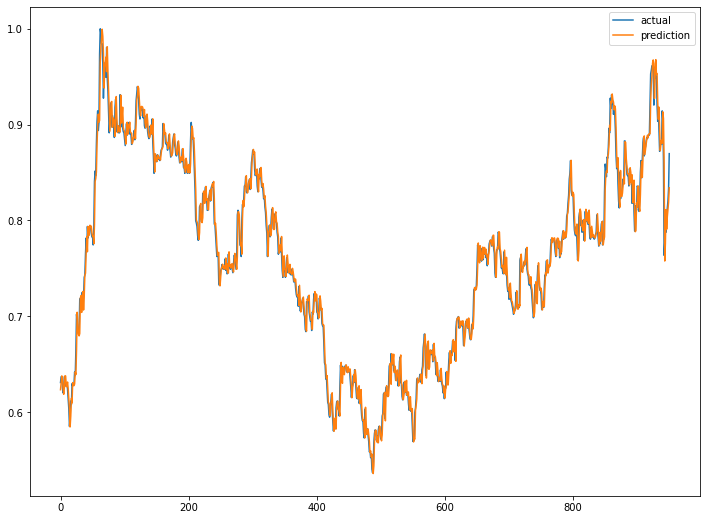

In [95]:
#예측데이터 시각화
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred1, label='prediction')
plt.legend()
plt.show()

### 2) window_size = 200으로 설정하여 장기 분석

In [151]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df.drop('Close', 1), scaled_df['Close'], test_size=0.2, random_state=0, shuffle=False)

import tensorflow as tf
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

#window_size : 시계열 예측을 위해 사용할 데이터 최근 갯수
WINDOW_SIZE=200
BATCH_SIZE=32

# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

# 모델 정의
model1 = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    
    # 양방향 LSTM
    Bidirectional(LSTM(16, activation='tanh')),
    
    # Dense 레이어
    Dense(16, activation="relu"),
    Dense(1),
])

import os
loss = Huber()
optimizer = Adam(0.005)
model1.compile(loss=Huber(), optimizer = optimizer, metrics = ['mse'])

#earlystopping 
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 10)
#val_loss 기준 체크포인터도 생성
filename = os.path.join('tmp', 'checkpointer.ckpt')
checkpoint = ModelCheckpoint(filename,
                            save_weights_only = True,
                            save_best_only=True,
                            monitor='val_loss',
                            verbose=1)

history = model1.fit(train_data,
                    validation_data=(test_data),
                    epochs=50,
                    callbacks=[checkpoint, earlystopping])

model1.load_weights(filename)
pred1 = model1.predict(test_data)

Epoch 1/50
    115/Unknown - 42s 244ms/step - loss: 1.8041e-04 - mse: 3.6081e-04
Epoch 1: val_loss improved from inf to 0.00046, saving model to tmp\checkpointer.ckpt
115/115 [==============================] - 46s 278ms/step - loss: 1.8041e-04 - mse: 3.6081e-04 - val_loss: 4.5965e-04 - val_mse: 9.1930e-04
Epoch 2/50
115/115 [==============================] - ETA: 0s - loss: 8.1272e-05 - mse: 1.6254e-04
Epoch 2: val_loss improved from 0.00046 to 0.00045, saving model to tmp\checkpointer.ckpt
115/115 [==============================] - 24s 205ms/step - loss: 8.1272e-05 - mse: 1.6254e-04 - val_loss: 4.5268e-04 - val_mse: 9.0537e-04
Epoch 3/50
115/115 [==============================] - ETA: 0s - loss: 9.4893e-05 - mse: 1.8979e-04
Epoch 3: val_loss did not improve from 0.00045
115/115 [==============================] - 23s 194ms/step - loss: 9.4893e-05 - mse: 1.8979e-04 - val_loss: 0.0014 - val_mse: 0.0028
Epoch 4/50
115/115 [==============================] - ETA: 0s - loss: 7.4054e-05 - mse

## 중요 변수 추출 - 그래프 그리기 실패,,

## 1) feature importance

모델에서 각 피처(변수)가 예측 결과에 얼마나 큰 영향을 미치는지를 나타내는 지표

* 이를 이용하면 모델이 어떤 피처를 주로 활용하여 예측을 수행하는지 파악할 수 있음.
* 중요한 피처들은 모델의 예측에 큰 영향을 미치는 요소로 간주됨



In [44]:
from tensorflow.keras.losses import mean_squared_error

X = scaled_df.drop('Close', 1)
base_error = mean_squared_error(y_test[20:], pred1)

# Permutation Importance 계산 함수
def permute_feature(X, y, model, metric):
    importances = []
    for i in range(X.shape[1]):  # 각 feature에 대해
        X_permuted = np.copy(X)
        np.random.shuffle(X_permuted[:, i])  # 각 feature의 값을 섞음
        y_pred = model.predict(X_permuted)
        
        # y_pred의 차원을 맞추기 위해 flatten
        y_pred = y_pred.flatten()
        
        # y와 y_pred의 크기가 같아야 함
        if len(y) != len(y_pred):
            raise ValueError(f"Size mismatch: y has {len(y)} elements but y_pred has {len(y_pred)} elements")
        
        permuted_error = metric(y[-len(y_pred):], y_pred)  # y_test를 y_pred 길이에 맞게 슬라이싱
        importances.append(permuted_error - base_error)  # 기준 에러와 비교
    return np.array(importances)

feature_importance = permute_feature(x_test, y_test, model1, mean_squared_error)
print("Feature Importances:", feature_importance)

31/31 [==============================] - 0s 11ms/step
Feature Importances: [[0.38162753 0.38315576 0.3850356  ... 0.3969342  0.39594105 0.39444095]
 [0.38174486 0.3832731  0.38515294 ... 0.39705154 0.39605838 0.39455828]
 [0.38174802 0.38327625 0.3851561  ... 0.3970547  0.39606154 0.39456144]
 ...
 [0.3555752  0.35710344 0.35898328 ... 0.3708819  0.36988872 0.36838862]
 [0.3514379  0.35296613 0.35484597 ... 0.36674458 0.36575142 0.36425132]
 [0.37268797 0.3742162  0.37609604 ... 0.38799465 0.38700148 0.38550138]]
